In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from scipy.stats import pearsonr
import os

[INFO] Aligning and merging sentiment and price data...
[INFO] Merged dataset shape: (2222, 15)
[INFO] Computing Pearson correlation...
[RESULT] Correlation: -0.0010 (p-value = 0.9624)
[INFO] Creating visualization...


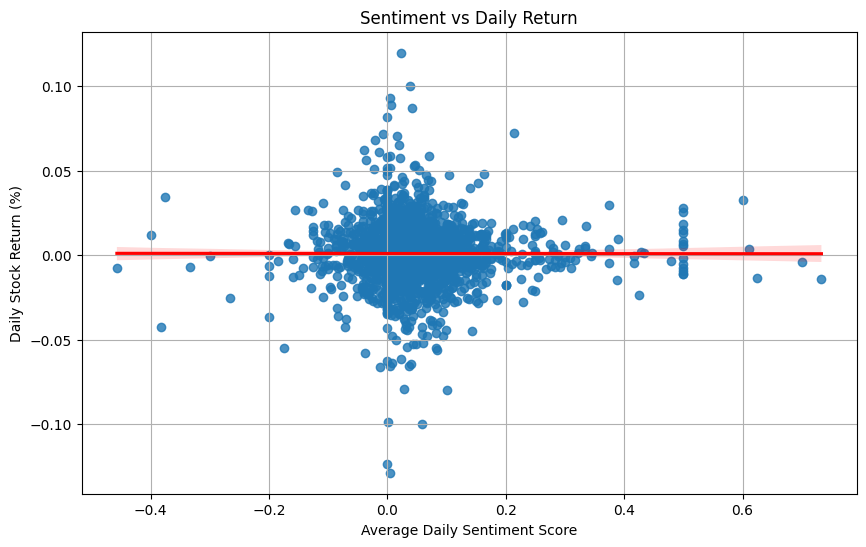

[INFO] Plot saved to outputs\sentiment_vs_return.png


In [13]:
class CorrelationAnalyzer:
    def __init__(self, sentiment_path, price_path, output_dir="outputs"):
        self.sentiment_path = sentiment_path
        self.price_path = price_path
        self.output_dir = output_dir
        os.makedirs(self.output_dir, exist_ok=True)

        self.sentiment_df = pd.read_csv(sentiment_path, parse_dates=['date'])
        self.price_df = pd.read_csv(price_path, parse_dates=['Date'])

    def merge_and_align(self):
        print("[INFO] Aligning and merging sentiment and price data...")
        self.price_df.rename(columns={'Date': 'date'}, inplace=True)
        merged_df = pd.merge(self.sentiment_df, self.price_df, on='date')
        cleaned_df = merged_df.dropna(subset=['sentiment', 'daily_return'])
        print(f"[INFO] Merged dataset shape: {cleaned_df.shape}")
        return cleaned_df

    def compute_correlation(self, df):
        print("[INFO] Computing Pearson correlation...")
        corr_matrix = df[['sentiment', 'daily_return']].corr()
        corr_value = corr_matrix.loc['sentiment', 'daily_return']
        
        pearson_r, p_value = pearsonr(df['sentiment'], df['daily_return'])
        print(f"[RESULT] Correlation: {pearson_r:.4f} (p-value = {p_value:.4f})")
        
        with open(os.path.join(self.output_dir, "correlation_summary.txt"), "w") as f:
            f.write(f"Pearson Correlation between sentiment and daily return: {pearson_r:.4f}\n")
            f.write(f"P-value: {p_value:.4f}\n")
        
        return pearson_r, p_value
    def visualize(self, df):
        print("[INFO] Creating visualization...")
        plt.figure(figsize=(10, 6))
        sns.regplot(x='sentiment', y='daily_return', data=df, line_kws={"color": "red"})
        plt.title("Sentiment vs Daily Return")
        plt.xlabel("Average Daily Sentiment Score")
        plt.ylabel("Daily Stock Return (%)")
        plt.grid(True)
        output_path = os.path.join(self.output_dir, "sentiment_vs_return.png")
        plt.savefig(output_path)
        plt.show()  # Display the plot interactively before closing it
        plt.close() # Close the figure after showing it
        print(f"[INFO] Plot saved to {output_path}")


    def run(self):
        df = self.merge_and_align()
        self.compute_correlation(df)
        self.visualize(df)


if __name__ == "__main__":
    analyzer = CorrelationAnalyzer(
        sentiment_path='../data/daily_sentiment.csv',
        price_path='../data/price_with_indicators.csv'
    )
    analyzer.run()
